This is the dataset used for the prdiction of heart disease in the normal human body based on various aspects; where there are 14 columns and out of which target is the num column (0 denotes to no disease(absence) and 1(1,2,3,4) to diseased i.e presence of disease)

In [1]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0


In [5]:
df['thal'].unique()

array([nan,  3.,  7.,  6.])

In [6]:
df.drop('ca',axis=1,inplace=True)   #as ca column only contains Nan values

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,0


In [8]:
df.shape

(200, 13)

In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
thal        float64
num           int64
dtype: object

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

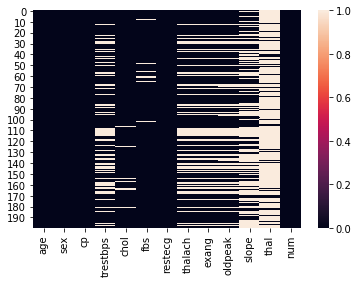

In [11]:
sns.heatmap(df.isnull()) #checking null values using heatmap

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  thal      34 non-null     float64
 12  num       200 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 20.4 KB


In [13]:
a=['trestbps','chol','fbs','thalach','oldpeak','slope','thal']

In [14]:
#removing NaN values with some mean or mode values
for i in a:
    df[i]=df.replace(np.NaN,df[i].mean())

In [15]:
df['exang']=df.replace(np.NaN,df['exang'].mode())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   fbs       200 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    float64
 8   exang     200 non-null    float64
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    float64
 11  thal      200 non-null    float64
 12  num       200 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 20.4 KB


In [17]:
#seperating the data in x and y

In [18]:
x=df.drop('num',axis=1)

In [19]:
y=df['num'].values
y=y.reshape(-1,1)

In [20]:
x.shape

(200, 12)

In [21]:
y.shape

(200, 1)

In [22]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,63,1,4,63.0,63.0,63.0,1,63.0,63.0,63.0,63.0,63.0
1,44,1,4,44.0,44.0,44.0,1,44.0,44.0,44.0,44.0,44.0
2,60,1,4,60.0,60.0,60.0,1,60.0,60.0,60.0,60.0,60.0
3,55,1,4,55.0,55.0,55.0,1,55.0,55.0,55.0,55.0,55.0
4,66,1,3,66.0,66.0,66.0,2,66.0,66.0,66.0,66.0,66.0


In [23]:
x.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -0.404091
chol       -0.404091
fbs        -0.404091
restecg     0.391463
thalach    -0.404091
exang      -0.404091
oldpeak    -0.404091
slope      -0.404091
thal       -0.404091
dtype: float64

In [24]:
x.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,59.350000,59.350000,59.350000,0.735000,59.350000,59.350000,59.350000,59.350000,59.350000
std,7.811697,0.171015,0.795701,7.811697,7.811697,7.811697,0.683455,7.811697,7.811697,7.811697,7.811697,7.811697
min,35.000000,0.000000,1.000000,35.000000,35.000000,35.000000,0.000000,35.000000,35.000000,35.000000,35.000000,35.000000
25%,55.000000,1.000000,3.000000,55.000000,55.000000,55.000000,0.000000,55.000000,55.000000,55.000000,55.000000,55.000000
50%,60.000000,1.000000,4.000000,60.000000,60.000000,60.000000,1.000000,60.000000,60.000000,60.000000,60.000000,60.000000
75%,64.000000,1.000000,4.000000,64.000000,64.000000,64.000000,1.000000,64.000000,64.000000,64.000000,64.000000,64.000000
max,77.000000,1.000000,4.000000,77.000000,77.000000,77.000000,2.000000,77.000000,77.000000,77.000000,77.000000,77.000000


In [25]:
#data visualization

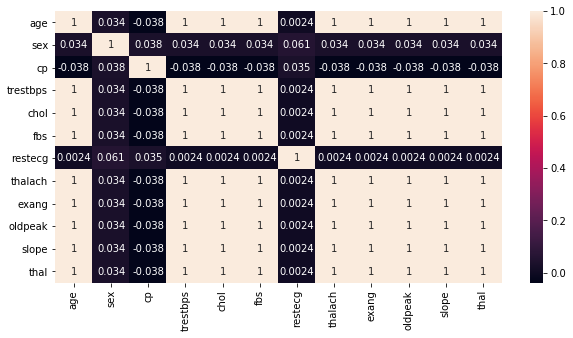

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(x.corr(),annot=True)

#so from the below graph we can interpret that most of the values are correlated amongst each other

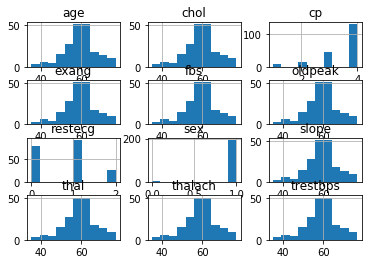

In [27]:
%matplotlib inline
x.hist()
plt.show()

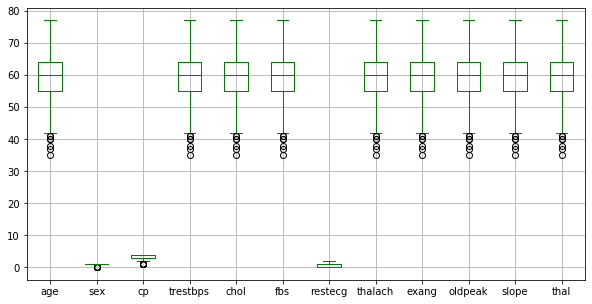

In [28]:
x.boxplot(figsize=(10,5),color='green')

Text(0, 0.5, 'CHOLESTROL LEVEL')

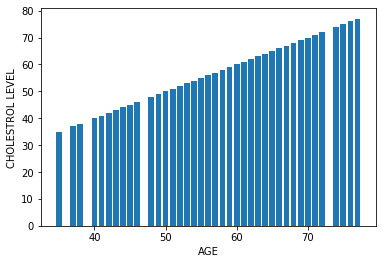

In [29]:
plt.bar(df['age'],df['chol'])
plt.xlabel('AGE')
plt.ylabel('CHOLESTROL LEVEL')
#from this graph we can infer that cholestrol level can be seen inc with age

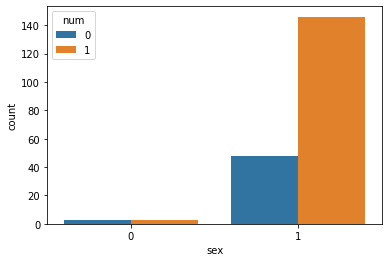

In [30]:
sns.countplot(df['sex'],hue=df['num'])

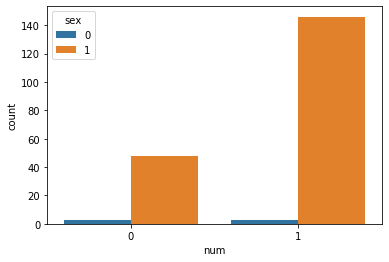

In [31]:
sns.countplot(df['num'],hue=df['sex'])

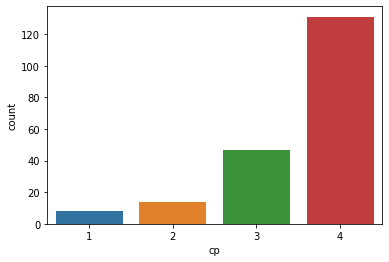

In [32]:
sns.countplot(df['cp'])

<BarContainer object of 200 artists>

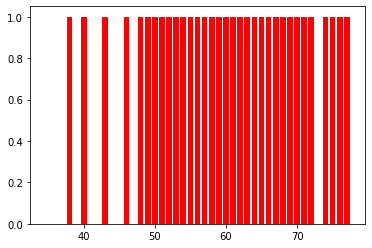

In [33]:
plt.bar(df["age"],df["num"],color='red')

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,63.0,63.0,63.0,1,63.0,63.0,63.0,63.0,63.0,1
1,44,1,4,44.0,44.0,44.0,1,44.0,44.0,44.0,44.0,44.0,0
2,60,1,4,60.0,60.0,60.0,1,60.0,60.0,60.0,60.0,60.0,1
3,55,1,4,55.0,55.0,55.0,1,55.0,55.0,55.0,55.0,55.0,1
4,66,1,3,66.0,66.0,66.0,2,66.0,66.0,66.0,66.0,66.0,0


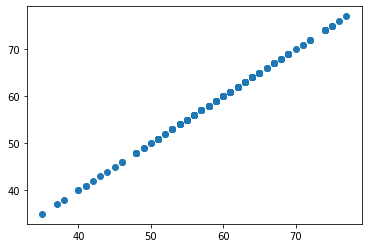

In [35]:
plt.scatter(df['age'],df['trestbps'])

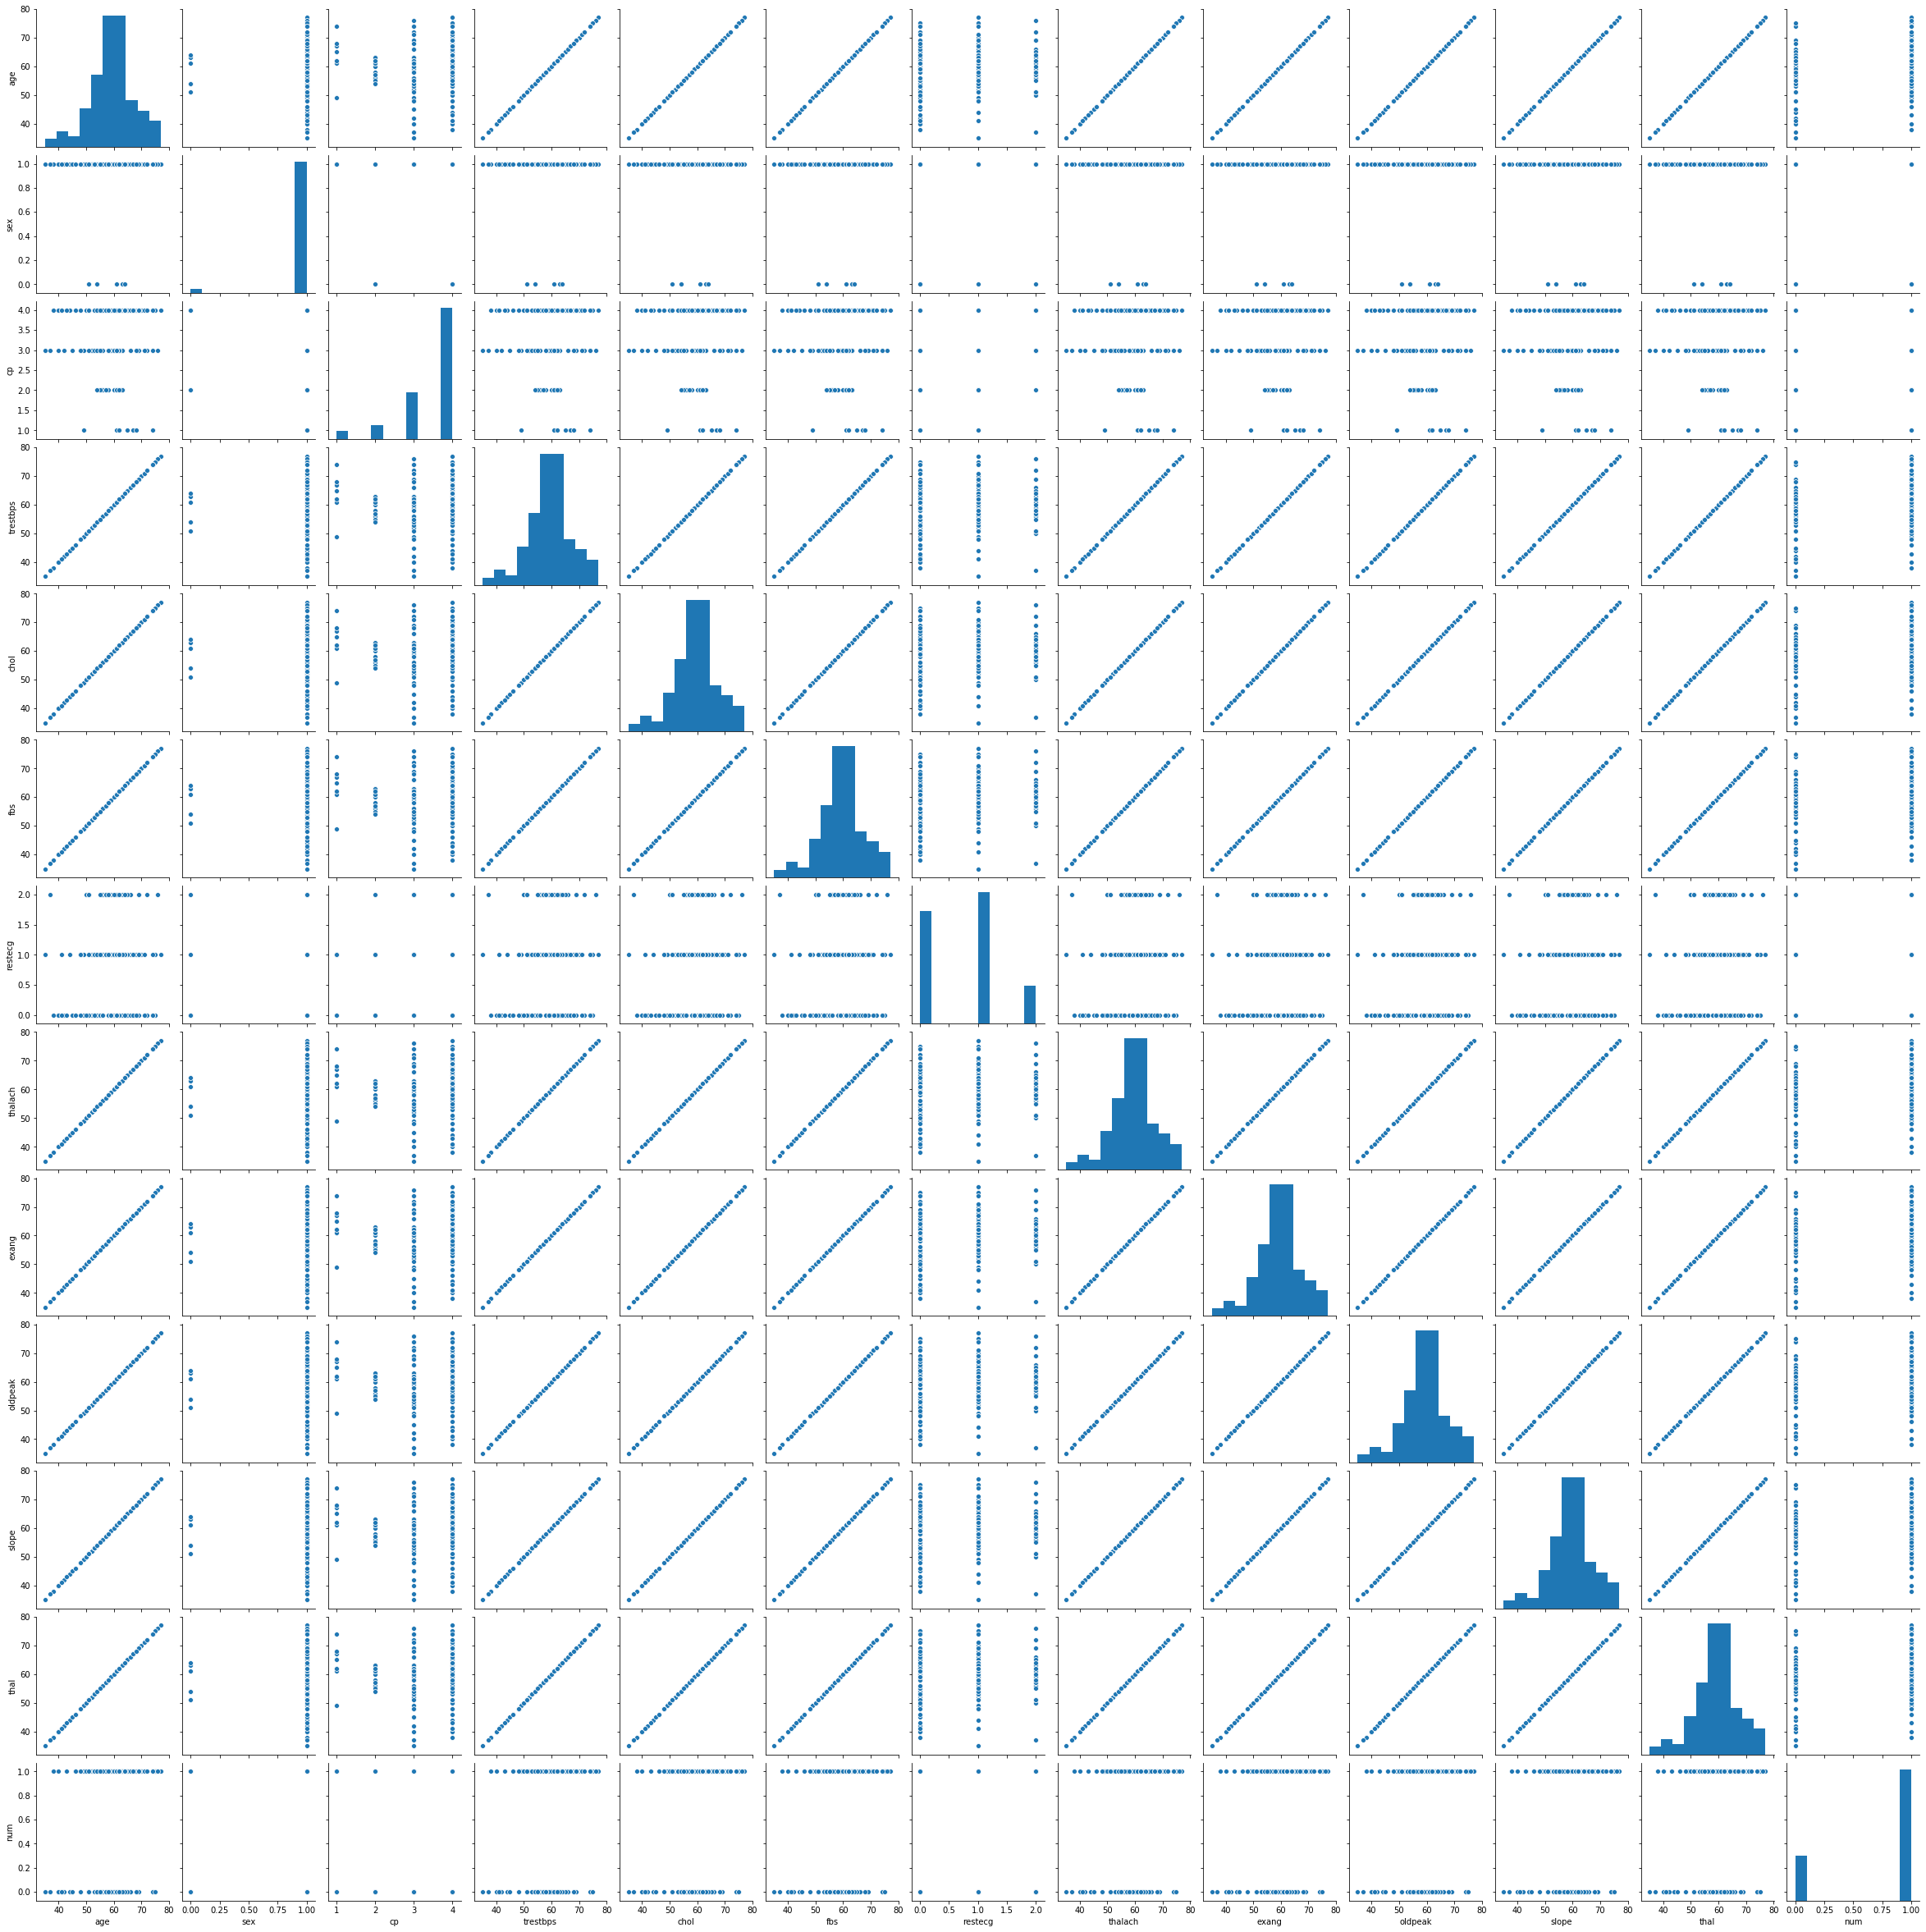

In [36]:
sns.pairplot(df)

In [37]:
#removing outliers

In [38]:
from scipy.stats import zscore

In [39]:
z=(np.abs(zscore(x)))

In [40]:
threshold=3
print(np.where(z>3))

(array([ 51,  66,  72,  76,  79,  96,  96,  96,  96,  96,  96,  96,  96,
        96,  97, 126, 128, 131, 133, 137, 190, 195, 196], dtype=int64), array([ 1,  2,  2,  2,  1,  0,  3,  4,  5,  7,  8,  9, 10, 11,  2,  1,  1,
        2,  2,  2,  1,  1,  2], dtype=int64))


In [41]:
x_new=x[(z<3).all(axis=1)]

In [42]:
x_new.shape

(185, 12)

In [43]:
x.shape

(200, 12)

In [44]:
#so we can see from the above that outliers with threshold as 3 has been removed

performing the satndardization will bring mean to 0 and standard deviation,variance to unit 

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
std=StandardScaler()

In [47]:
x=std.fit_transform(x)

In [48]:
x=pd.DataFrame(data=x)

In [49]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.468421,0.175863,0.623654,0.468421,0.468421,0.468421,0.388709,0.468421,0.468421,0.468421,0.468421,0.468421
1,-1.969933,0.175863,0.623654,-1.969933,-1.969933,-1.969933,0.388709,-1.969933,-1.969933,-1.969933,-1.969933,-1.969933
2,0.083417,0.175863,0.623654,0.083417,0.083417,0.083417,0.388709,0.083417,0.083417,0.083417,0.083417,0.083417
3,-0.558255,0.175863,0.623654,-0.558255,-0.558255,-0.558255,0.388709,-0.558255,-0.558255,-0.558255,-0.558255,-0.558255
4,0.853424,0.175863,-0.636253,0.853424,0.853424,0.853424,1.855535,0.853424,0.853424,0.853424,0.853424,0.853424


In [50]:
#performing classification with various models

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [52]:
#model=[KNeighborsClassifier(),SVC(),DecisionTreeClassifier()]

In [53]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    dtc=DecisionTreeClassifier(criterion='entropy')
    dtc.fit(x_train,y_train)
    pred2=dtc.predict(x_test)
    acc_score=accuracy_score(pred2,y_test)
    print("accuracy score corrosponding to the random state:",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print()
print()
print("max accuracy score for the final random state:",r_state,"is:",max_acc_score) 

score=cross_val_score(dtc,x,y,cv=5).mean()
print("cross val score is",score)

accuracy score corrosponding to the random state: 42 is: 0.6212121212121212
accuracy score corrosponding to the random state: 43 is: 0.6515151515151515
accuracy score corrosponding to the random state: 44 is: 0.7121212121212122
accuracy score corrosponding to the random state: 45 is: 0.6515151515151515
accuracy score corrosponding to the random state: 46 is: 0.6515151515151515
accuracy score corrosponding to the random state: 47 is: 0.6212121212121212
accuracy score corrosponding to the random state: 48 is: 0.6515151515151515
accuracy score corrosponding to the random state: 49 is: 0.5757575757575758
accuracy score corrosponding to the random state: 50 is: 0.6060606060606061
accuracy score corrosponding to the random state: 51 is: 0.6818181818181818
accuracy score corrosponding to the random state: 52 is: 0.6212121212121212
accuracy score corrosponding to the random state: 53 is: 0.6515151515151515
accuracy score corrosponding to the random state: 54 is: 0.696969696969697
accuracy scor

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.30)

In [55]:
a=['linear','rbf','poly']
for i in a:
    svc=SVC(kernel=i)
    svc.fit(x_train,y_train)
    pred1=svc.predict(x_test)
    print("accuracy score for kernel",i,"is:",accuracy_score(pred1,y_test))

score=cross_val_score(svc,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for kernel linear is: 0.75
accuracy score for kernel rbf is: 0.7666666666666667
accuracy score for kernel poly is: 0.7333333333333333
cross val score is: 0.76


In [56]:
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred2=knn.predict(x_test)
    print("accuracy score for neighbors",i,"is:",accuracy_score(pred2,y_test))
    
score=cross_val_score(knn,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for neighbors 1 is: 0.6333333333333333
accuracy score for neighbors 2 is: 0.6
accuracy score for neighbors 3 is: 0.7833333333333333
accuracy score for neighbors 4 is: 0.7333333333333333
accuracy score for neighbors 5 is: 0.75
accuracy score for neighbors 6 is: 0.7333333333333333
accuracy score for neighbors 7 is: 0.8
accuracy score for neighbors 8 is: 0.75
accuracy score for neighbors 9 is: 0.8
accuracy score for neighbors 10 is: 0.7833333333333333
accuracy score for neighbors 11 is: 0.7666666666666667
accuracy score for neighbors 12 is: 0.7666666666666667
accuracy score for neighbors 13 is: 0.75
accuracy score for neighbors 14 is: 0.7666666666666667
accuracy score for neighbors 15 is: 0.75
accuracy score for neighbors 16 is: 0.75
accuracy score for neighbors 17 is: 0.75
accuracy score for neighbors 18 is: 0.75
accuracy score for neighbors 19 is: 0.75
accuracy score for neighbors 20 is: 0.75
cross val score is: 0.74


In [57]:
from sklearn.ensemble import RandomForestClassifier 

In [58]:
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestClassifier(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('accuracy score at',i,'is:',accuracy_score(predrd,y_test))

accuracy score at 150 is: 0.6333333333333333
accuracy score at 200 is: 0.7333333333333333
accuracy score at 250 is: 0.65
accuracy score at 300 is: 0.7166666666666667
accuracy score at 350 is: 0.6833333333333333


In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gd=GradientBoostingClassifier(learning_rate=0.1)

In [61]:
gd.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
predgd=gd.predict(x_test)

In [63]:
accuracy_score(predgd,y_test)

0.7166666666666667

In [73]:
from sklearn.linear_model import LogisticRegression

In [77]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(pred,y_test)
    print("accuracy score corrosponding to random state:",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print()
print()
print("the max accuracy score for final random state",final_r_state,"is:",max_acc_score)

accuracy score corrosponding to random state: 42 is: 0.725
accuracy score corrosponding to random state: 43 is: 0.75
accuracy score corrosponding to random state: 44 is: 0.775
accuracy score corrosponding to random state: 45 is: 0.75
accuracy score corrosponding to random state: 46 is: 0.675
accuracy score corrosponding to random state: 47 is: 0.775
accuracy score corrosponding to random state: 48 is: 0.725
accuracy score corrosponding to random state: 49 is: 0.65
accuracy score corrosponding to random state: 50 is: 0.75
accuracy score corrosponding to random state: 51 is: 0.7
accuracy score corrosponding to random state: 52 is: 0.65
accuracy score corrosponding to random state: 53 is: 0.725
accuracy score corrosponding to random state: 54 is: 0.85
accuracy score corrosponding to random state: 55 is: 0.775
accuracy score corrosponding to random state: 56 is: 0.75
accuracy score corrosponding to random state: 57 is: 0.775
accuracy score corrosponding to random state: 58 is: 0.725
accura

#conclusion:-so from the above implementation we can infer that we can achieve atmost of 80% accuracy with classifiers and 90% with logistic regression so,we will finally use this model for saving the result

In [64]:
#finalizing the model for the prediction

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=65,test_size=0.20)
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracy score for logistic reg model is:',accuracy_score(y_test,predlg))

h1=pd.DataFrame(data=predlg)
h1.to_csv('heart_disease_result.csv')

accuracy score for logistic reg model is: 0.9


In [85]:
print(classification_report(y_test,predlg))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.90      1.00      0.95        35

    accuracy                           0.90        40
   macro avg       0.95      0.60      0.64        40
weighted avg       0.91      0.90      0.87        40



In [84]:
print(confusion_matrix(y_test,predlg))

[[ 1  4]
 [ 0 35]]


In [69]:
#saving the final model

In [70]:
from sklearn.externals import joblib

In [71]:
joblib.dump(knn,'heartdisease.obj')

['heartdisease.obj']